In [1]:
from copy import deepcopy
from statistics import stdev
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def graph_progress(all_costs, all_accuracies, show_recents=True):
    # last 5 results
    # ---------------
    if show_recents:
        line1 = "cost: "
        line2 = "acc:  "
        for i in range(-5, 0):
            line1 += "{:>6} ".format(round(all_costs[i], 3))
            line2 += "{:>6}%".format(round(all_accuracies[i]*100, 2))
        print(line1)
        print(line2)


    # graphs
    # -------
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    axes[0].plot(range(len(all_costs)), all_costs, label="costs")
    axes[0].set_xlabel('step') # Set the y axis label of the current axis.
    axes[0].set_ylabel('cost') # Set a title of the current axes.
    axes[0].set_title('cost over training steps') 
    axes[0].legend() # show a legend on the plot

    axes[1].plot(range(len(all_accuracies)), all_accuracies, label="accuracies")
    axes[1].set_xlabel('step') # Set the y axis label of the current axis.
    axes[1].set_ylabel('accuracy') # Set a title of the current axes.
    axes[1].set_title('accuracy over training steps') 
    axes[1].legend() # show a legend on the plot

    return fig.tight_layout()

# import training data

In [3]:
import pandas as pd #1
import os           #3

In [4]:
given_data_folder = 'prepped'

file_names = os.listdir(given_data_folder)
file_names.sort()
file_names

['M_predictions.csv',
 'M_testing.csv',
 'M_training_data.csv',
 'W_predictions.csv',
 'W_testing.csv',
 'W_training_data.csv',
 'practice_submission_0.csv',
 'test_1.csv',
 'test_2.csv',
 'test_3.csv']

In [5]:
training_data_file = 'W_training_data.csv'

In [6]:
file_path = given_data_folder + '/' + training_data_file 
training_df  = pd.read_csv(file_path)
print(len(training_df))

training_df.head(5)

46386


,Pts,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,...,xFTM_a,xFTA_a,xOR_a,xDR_a,xAst_a,xTO_a,xStl_a,xBlk_a,xPF_a,solution
0,0.571429,0.549107,0.666667,0.252747,0.371429,0.769231,0.764706,0.500000,0.605263,0.291667,...,-0.800000,-0.735294,-0.500000,-0.605263,-0.666667,-0.740741,-0.9375,-0.555556,-0.896552,1
1,0.469388,0.563187,0.650000,0.219048,0.428571,1.000000,0.294118,0.318182,0.526316,0.250000,...,-0.562500,-0.470588,-0.636364,-0.710526,-1.041667,-0.370370,-0.6875,-0.222222,-0.517241,-1
2,0.642857,0.557823,0.700000,0.394286,0.714286,0.619048,0.617647,0.772727,0.578947,0.416667,...,-0.636364,-0.323529,-0.181818,-0.684211,-0.500000,-0.777778,-0.3750,-0.222222,-0.655172,1
3,0.632653,0.545518,0.850000,0.328571,0.571429,0.705882,0.500000,0.772727,0.684211,0.416667,...,-0.612903,-0.911765,-0.818182,-0.657895,-0.750000,-0.222222,-0.5625,-1.222222,-0.517241,-1
4,0.622449,0.686384,0.533333,0.352041,0.400000,0.647059,1.000000,0.454545,0.815789,0.375000,...,-0.550000,-0.588235,-0.136364,-0.368421,-0.375000,-0.370370,-0.5000,-0.000000,-0.896552,1


## get as rows

In [26]:
# wether or not to keep the data for stats against a team
keep_against = True

In [27]:
training_column_names = training_df.columns.tolist()

# get all data as columns
training_columns = []
for i in range(len(training_column_names)):
    new_column = list(training_df[training_column_names[i]])
    training_columns.append(new_column)
    
    
    
# indicis
# 30 each 0:14, 14:28, 28:42, 42:56
if not keep_against:
    new_training_columns = training_columns[0:14] + training_columns[28:42] + [training_columns[56]]
    training_columns = new_training_columns
    
    
    
# get as rows
training_input_rows    = []
training_solution_rows = []
for i in range(len(training_columns[0])):
    new_input_row    = []
    new_solution_row = [training_columns[-1][i]]
    for j in range(len(training_columns)-1):
        new_input_row.append(training_columns[j][i])
        
    training_input_rows   .append(new_input_row)
    training_solution_rows.append(new_solution_row)
    
print(len(training_input_rows), len(training_input_rows[0]))
print(len(training_solution_rows), len(training_solution_rows[0]))

46386 56
46386 1


In [28]:
#split = 14000
#np_inputs    = np.array(training_input_rows[:split])
#np_solutions = np.array(training_solution_rows[:split])

np_inputs    = np.array(training_input_rows)
np_solutions = np.array(training_solution_rows)

np_data = [np_inputs, np_solutions]

# Create and Train population

In [29]:
import sys
sys.path.append("../../..")

from network_matrix.population_v3 import Population

### create it here

In [30]:
'''
learning_rate, steps, batch_size,    cost,      acc,
-------------- ------ ----------- -------- ---------
       0.0001,    50,          2,   0.224,   63.73%,
       
       0.0001,    50,          2,   0.229,   61.77%, # 5 games, without against
       
''';
num_inputs = len(np_inputs[0])
num_inputs

56

In [31]:
TEST_population  = Population(num_inputs, 1, learning_rate=0.0001)

all_times = [0,0,0,0,0]
all_costs = []
all_accuracies = []

In [32]:
# training loops
# ---------------
#times, costs, accuracies = TEST_population.train_and_test(np_data, 6_000)
times, costs, accuracies = TEST_population.train_and_test_stochastic(np_data, 50, batch_size=2)

# update tracking
# ---------------
for i in range(len(all_times)):
    all_times[i] += times[i]
all_costs      += costs
all_accuracies += accuracies

Training Progress:                             |  cost     acc  |     steps           time      remaining  
                                               | ------  ------ | ----------  -------------  ------------- 


 
               time(s)   percent  per step       | steps:               50
            ----------  --------  --------       | learning rate:   0.0001
calc value    1m 39.4s     24.52%     1.99       | # connections:    12070
grad dscnt    2m 58.7s     44.08%     3.57       | L1 (sum):        0.0004
scoring          48.4s     11.93%     0.97       | L2 (**2):        0.0049
step time     6m 45.5s     100.0%     8.11

cost:  0.227  0.227  0.227  0.227  0.227 
acc:   62.59% 62.58% 62.58% 62.59% 62.59%


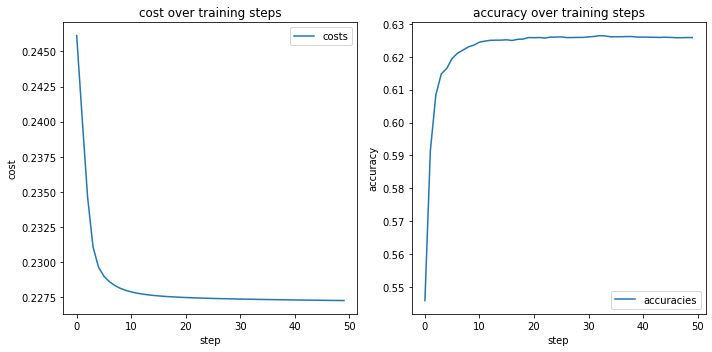

In [33]:
TEST_population.report_training_progress(all_times)     # timing
graph_progress(all_costs, all_accuracies)               # graphs
#graph_progress(all_costs[100:], all_accuracies[100:], show_recents=True) # graphs (recent)

In [34]:
TEST_population.print_magnitudes_report()


           abs_avg   abs_med       sum       max       min
          --------  --------  --------  --------  --------
values       0.184     0.161     0.479     0.482    -0.637
biases        0.06     0.034    -0.908     0.374    -0.289
weights      0.055     0.037      8.05     0.465    -0.356
          --------  --------  --------  --------  --------
values       0.092      0.08    -0.498     0.376     -0.25
biases       0.032     0.021      0.62     0.192    -0.188
weights      0.043     0.029    -2.948     0.361    -0.328
          --------  --------  --------  --------  --------
values       0.242     0.242    -0.242    -0.242    -0.242
biases       0.285     0.285    -0.285    -0.285    -0.285
weights      0.077     0.062    -0.637     0.316    -0.295


# import testing data

In [16]:
testing_data_file = 'W_testing.csv'

In [17]:
file_path = given_data_folder + '/' + testing_data_file 
testing_df  = pd.read_csv(file_path)
print(len(testing_df))

testing_df.head(5)

610814


,team_1_id,team_2_id,Pts,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,...,xFGA3_a,xFTM_a,xFTA_a,xOR_a,xDR_a,xAst_a,xTO_a,xStl_a,xBlk_a,xPF_a
0,3101_2017,3102_2017,0.908163,0.732143,0.533333,0.667411,0.914286,0.750000,0.705882,0.590909,...,-0.514286,-0.866667,-0.441176,-0.318182,-0.684211,-0.333333,-0.666667,-0.2500,-0.333333,-0.689655
1,3102_2017,3101_2017,0.408163,0.274554,0.533333,0.547619,0.342857,0.727273,0.647059,0.409091,...,-0.342857,-0.642857,-0.411765,-0.409091,-0.631579,-0.291667,-0.370370,-0.4375,-0.666667,-0.586207
2,3101_2017,3103_2017,0.908163,0.732143,0.533333,0.667411,0.914286,0.750000,0.705882,0.590909,...,-0.514286,-0.866667,-0.441176,-0.318182,-0.684211,-0.333333,-0.666667,-0.2500,-0.333333,-0.689655
3,3103_2017,3101_2017,0.377551,0.475893,0.666667,0.102679,0.457143,0.571429,0.411765,0.363636,...,-0.457143,-0.500000,-0.588235,-0.681818,-0.947368,-0.791667,-0.555556,-0.3125,-0.000000,-0.586207
4,3101_2017,3104_2017,0.908163,0.732143,0.533333,0.667411,0.914286,0.750000,0.705882,0.590909,...,-0.514286,-0.866667,-0.441176,-0.318182,-0.684211,-0.333333,-0.666667,-0.2500,-0.333333,-0.689655


In [18]:
testing_column_names = testing_df.columns.tolist()

# get all data as columns
testing_columns = []
for i in range(len(testing_column_names)):
    new_column = list(testing_df[testing_column_names[i]])
    testing_columns.append(new_column)
    
    
    
# indicis
# 30 each 2:16, 16:30, 30:44, 44:58
if not keep_against:
    new_testing_columns = testing_columns[0:2] + testing_columns[2:16] + testing_columns[30:44]
    testing_columns = new_testing_columns
    
    
    
# get as rows
testing_input_rows    = []
testing_solution_rows = []
for i in range(len(testing_columns[0])):
    new_input_row    = []
    new_solution_row = [testing_columns[0][i], testing_columns[1][i]]
    for j in range(2, len(testing_columns)):
        new_input_row.append(testing_columns[j][i])
        
    testing_input_rows   .append(new_input_row)
    testing_solution_rows.append(new_solution_row)
    
print(len(testing_input_rows), len(testing_input_rows[0]))
print(len(testing_solution_rows), len(testing_solution_rows[0]))

610814 28
610814 2


In [19]:
testing_inputs = np.array(testing_input_rows)

### testing

In [20]:
#             ID, Pred
# 2017_1101_1102,  0.5

In [21]:
# each matchup has two outputs
output_rows = []

outputs = []
for i in range(len(testing_input_rows)):
    TEST_population.layers[0]["values"] = testing_inputs[i]
    output = TEST_population.calculate_values()
    outputs.append(output[0]) 
    
    if len(outputs) == 2:
        team_1 = testing_solution_rows[i-1][0].split('_') # 1101_2017
        team_2 = testing_solution_rows[i-1][1].split('_') # 1102_2017
        year = team_1[1]
        matchup_ID = "{}_{}_{}".format(year, team_1[0], team_2[0])
        
        
        output_pred = (outputs[0] + (outputs[1]*-1))/2
        final_pred  = (output_pred+1)/2
        
        
        output_rows.append([matchup_ID, final_pred])
        outputs = []
        
        
    progress = "{:>5}%".format(round( (i/len(testing_input_rows))*100, 2 ))
    print(progress, end="\r")
        
print('\n', len(output_rows))

 0.21%

100.0%
 305407


In [22]:
out_sum = 0
out_avg = 0
abs_sum = 0
abs_avg = 0

for i in range(len(output_rows)):
    out_sum += output_rows[i][1]
    abs_sum += abs(output_rows[i][1])

out_avg = round(out_sum / len(output_rows), 5)
abs_avg = round(abs_sum / len(output_rows), 5)
out_sum = round(out_sum, 5)

print("average: {:>7} | abs average: {:>7} | sum: {:>7}".format(  out_avg, abs_avg, out_sum ))

average: 0.50392 | abs average: 0.50392 | sum: 153901.51866


### create output file

In [23]:
output_headers = ["ID", "Pred"]

In [24]:
# create the final dataframe
predictions_df = pd.DataFrame(output_rows, columns=output_headers)

print(predictions_df.shape)
predictions_df.head()

(305407, 2)


,ID,Pred
0,2017_3101_3102,0.738079
1,2017_3101_3103,0.766036
2,2017_3101_3104,0.697640
3,2017_3101_3105,0.679742
4,2017_3101_3106,0.650297


In [25]:
# to csv
file_name = "prepped/W_predictions.csv"
predictions_df.to_csv(file_name, index=False)